In [8]:
#pip install wfdb
#pip install mitbih_processor
import numpy as np
import pandas as pd
import wfdb
import mitbih_processor
from mitbih_processor import qrsintervals
from mitbih_processor.datasets import CHAZAL_TEST_DATASET, CHAZAL_TRAIN_DATASET
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
#Define the extraction parameters
mitdbih_db_path = 'data/'
mat_file = 'ecg_signals.mat'
annotations = 'A', 'V', 'N', 'L', 'R'
records_to_extract = CHAZAL_TEST_DATASET + CHAZAL_TRAIN_DATASET
start_sample_index = 0
end_sample_index = 650_000
qrs_interval_length = 320
ecg_lead = 'MLII'

# Extract the signals and save them to a .mat file
qrsintervals.extract_qrs_intervals_and_save(
    mitdbih_db_path,                       # MIT-BIH Arrhythmia Database path
    mat_file,                              # Resultig .mat file path
    annotations,                           # Annotations
    lead=ecg_lead,                         # ECG lead
    sampfrom=start_sample_index,           # Start sample index
    sampto=end_sample_index,               # End sample index
    dataset=records_to_extract,            # Records to extract
    interval_length=qrs_interval_length    # QRS Interval length
)

Extracting QRS intervals for labels A, V, N, L, R
Extracting QRS intervals from record 100
 - Label A, 33 item(s)
 - Label V, 1 item(s)
Could not cut RR interval from QRS index 76
Could not cut RR interval from QRS index 649992
 - Label N, 2237 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 103
 - Label A, 2 item(s)
 - Label V, 0 item(s)
Could not cut RR interval from QRS index 649875
 - Label N, 2081 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 105
 - Label A, 0 item(s)
 - Label V, 41 item(s)
 - Label N, 2526 item(s)
 - Label L, 0 item(s)
 - Label R, 0 item(s)
Extracting QRS intervals from record 111


In [2]:
# Load the ecg_signals.mat file
ECG_signals = sio.loadmat('ecg_signals.mat')
N_signals = ECG_signals['N']
A_signals = ECG_signals['A']
V_signals = ECG_signals['V']
L_signals = ECG_signals['L']
R_signals = ECG_signals['R']

print('The matrix contains signals as rows')
print('Shape of the N_signals matrix:', N_signals.shape)
print('Shape of the A_signals matrix:', A_signals.shape)
print('Shape of the V_signals matrix:', V_signals.shape)
print('Shape of the L_signals matrix:', L_signals.shape)
print('Shape of the R_signals matrix:', R_signals.shape)
print('N contains', f'{N_signals.shape[0]}', 'signals, each one of 320 samples')
print('A contains', f'{A_signals.shape[0]}', 'signals, each one of 320 samples')
print('V contains', f'{V_signals.shape[0]}', 'signals, each one of 320 samples')
print('L contains', f'{L_signals.shape[0]}', 'signals, each one of 320 samples')
print('R contains', f'{R_signals.shape[0]}', 'signals, each one of 320 samples')

The matrix contains signals as rows
Shape of the N_signals matrix: (74512, 320)
Shape of the A_signals matrix: (2546, 320)
Shape of the V_signals matrix: (6902, 320)
Shape of the L_signals matrix: (8072, 320)
Shape of the R_signals matrix: (7257, 320)
N contains 74512 signals, each one of 320 samples
A contains 2546 signals, each one of 320 samples
V contains 6902 signals, each one of 320 samples
L contains 8072 signals, each one of 320 samples
R contains 7257 signals, each one of 320 samples


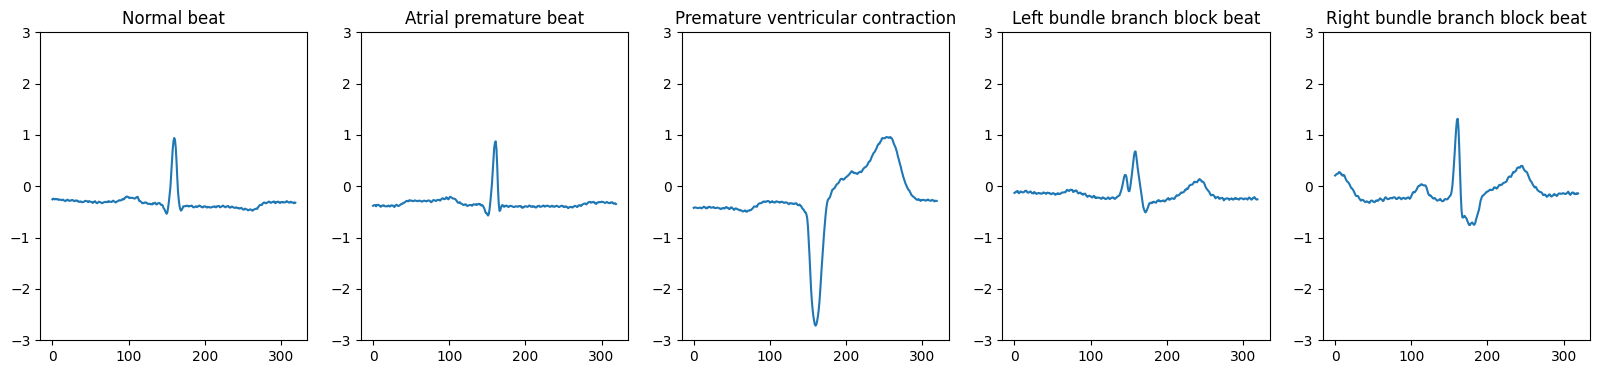

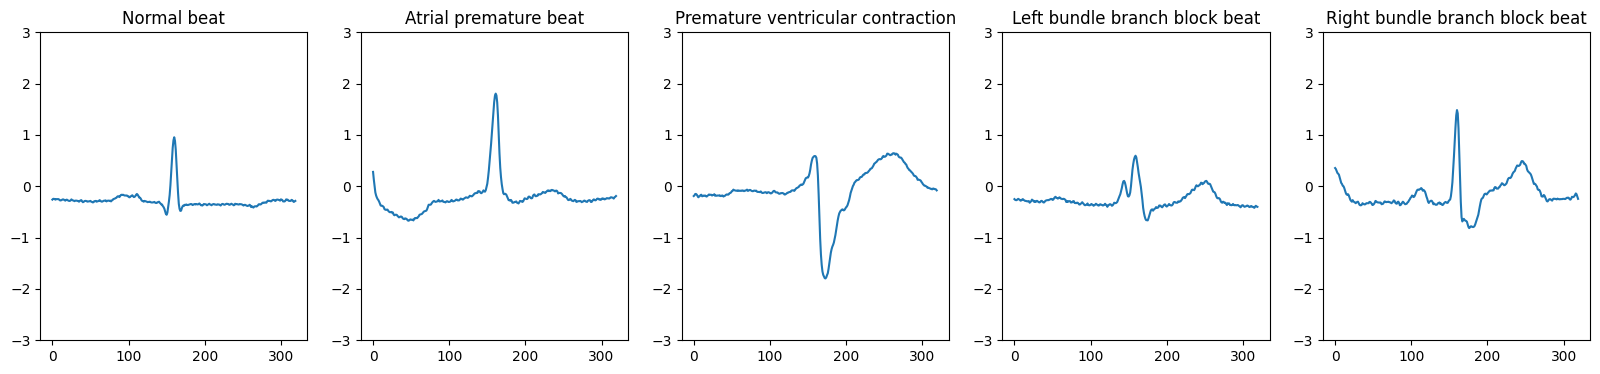

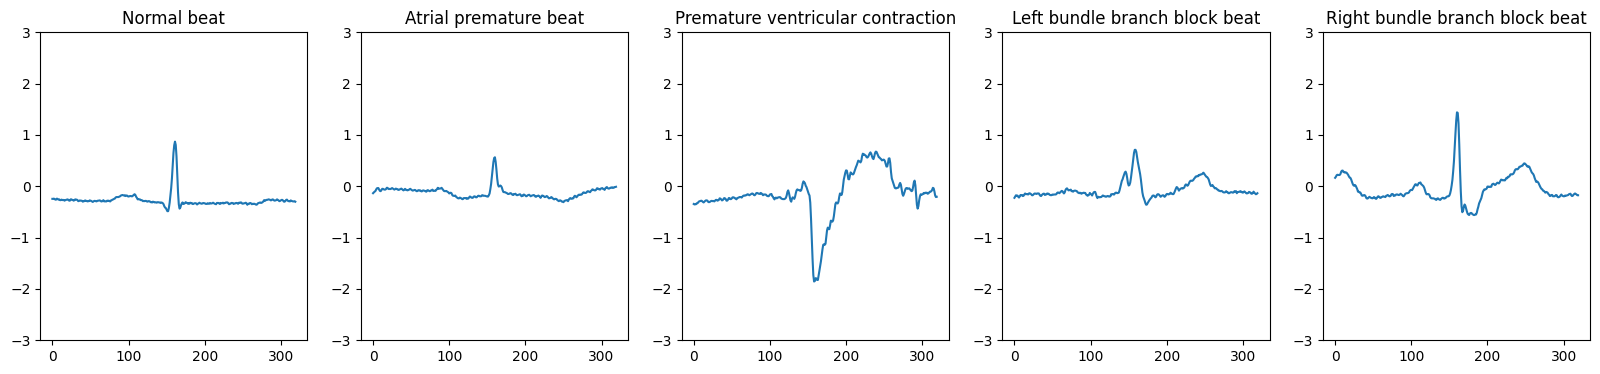

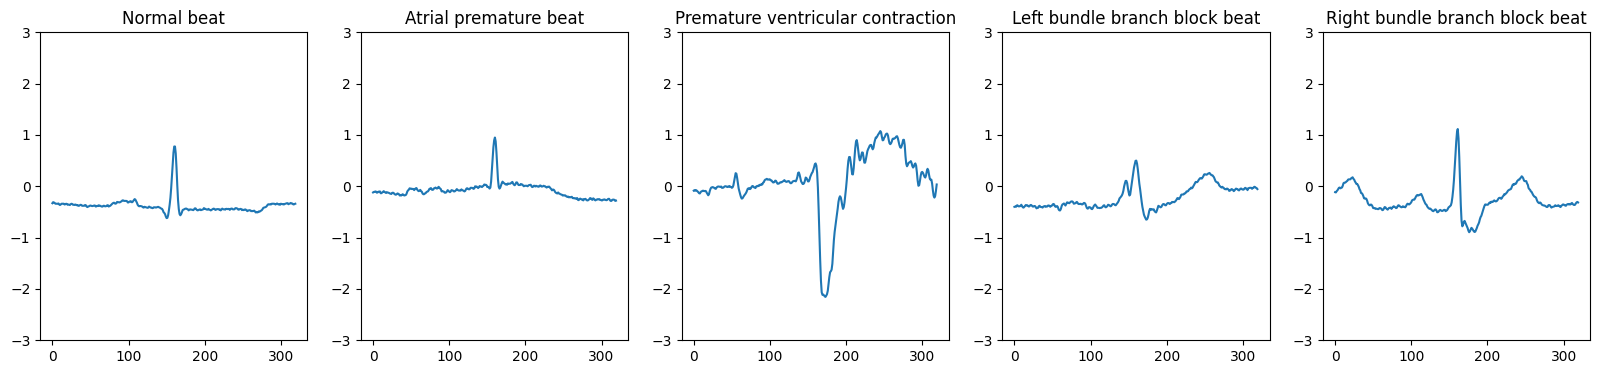

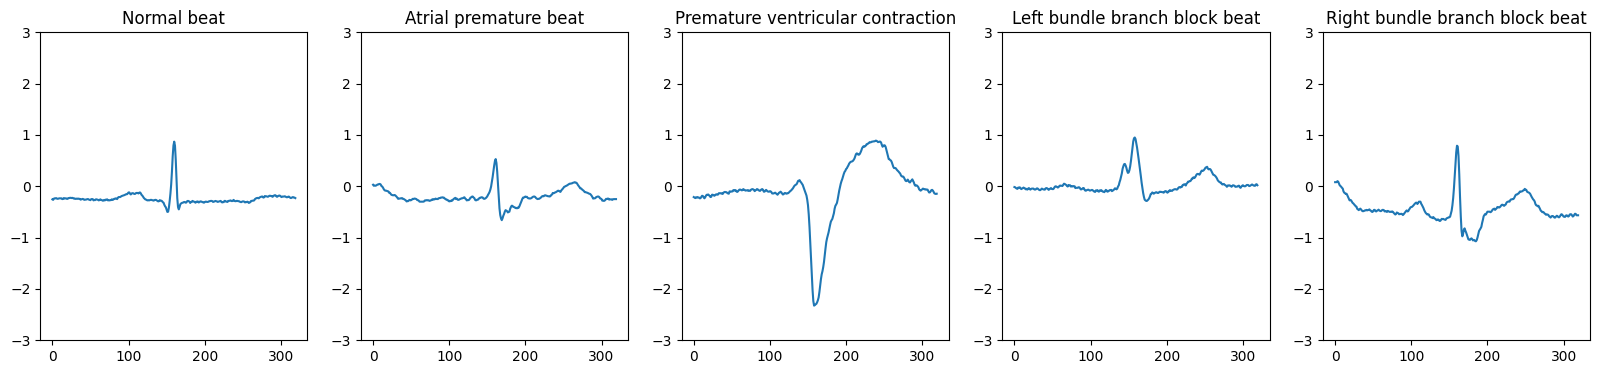

In [3]:
# Plot the signals
x = range(0, 320)
for i in range(0, 500, 100):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))    
    ax1.set_title('Normal beat')
    ax1.plot(x, N_signals[i, :])
    ax1.set_ylim([-3, 3])
    ax2.set_title('Atrial premature beat')
    ax2.plot(x, A_signals[i, :])
    ax2.set_ylim([-3, 3])    
    ax3.set_title('Premature ventricular contraction')
    ax3.plot(x, V_signals[i, :])
    ax3.set_ylim([-3, 3])    
    ax4.set_title('Left bundle branch block beat')
    ax4.plot(x, L_signals[i, :])
    ax4.set_ylim([-3, 3])
    ax5.set_title('Right bundle branch block beat')
    ax5.plot(x, R_signals[i, :])
    ax5.set_ylim([-3, 3])    
    plt.show()

In [6]:
train_indices_N = np.random.choice(N_signals.shape[0], size=2000, replace=False)
train_indices_A = np.random.choice(A_signals.shape[0], size=2000, replace=False)
train_indices_V = np.random.choice(V_signals.shape[0], size=2000, replace=False)
train_indices_L = np.random.choice(L_signals.shape[0], size=2000, replace=False)
train_indices_R = np.random.choice(R_signals.shape[0], size=2000, replace=False)

test_indices_N = np.random.choice(np.setdiff1d(np.arange(N_signals.shape[0]), train_indices_N), size=500, replace=False)
test_indices_A = np.random.choice(np.setdiff1d(np.arange(A_signals.shape[0]), train_indices_A), size=500, replace=False)
test_indices_V = np.random.choice(np.setdiff1d(np.arange(V_signals.shape[0]), train_indices_V), size=500, replace=False)
test_indices_L = np.random.choice(np.setdiff1d(np.arange(L_signals.shape[0]), train_indices_L), size=500, replace=False)
test_indices_R = np.random.choice(np.setdiff1d(np.arange(R_signals.shape[0]), train_indices_R), size=500, replace=False)

In [9]:
Training_data = pd.DataFrame(
    np.vstack(
    (N_signals[train_indices_N, :], 
     A_signals[train_indices_A, :], 
     V_signals[train_indices_V, :], 
     L_signals[train_indices_L, :], 
     R_signals[train_indices_R, :])
    )
)

Training_label = np.hstack((["N"]*2000, ["A"]*2000, ["V"]*2000, ["L"]*2000, ["R"]*2000))
Training_data['Label'] = Training_label

Testing_data = pd.DataFrame(
    np.vstack(
    (N_signals[test_indices_N, :], 
     A_signals[test_indices_A, :], 
     V_signals[test_indices_V, :], 
     L_signals[test_indices_L, :], 
     R_signals[test_indices_R, :])
    )
)
Testing_label = np.hstack((["N"]*500, ["A"]*500, ["V"]*500, ["L"]*500, ["R"]*500))
Testing_data['Label'] = Testing_label